In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet('/Users/TimothyW/Fun/cricket_prediction/data/processed_first_innings/first_innings_processed.parquet')

In [4]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import LeaveOneGroupOut


In [5]:
splitter = GroupShuffleSplit(
     test_size=0.5, n_splits=2, random_state=69
     )

In [6]:
split = splitter.split(df, groups = df['match_id'])

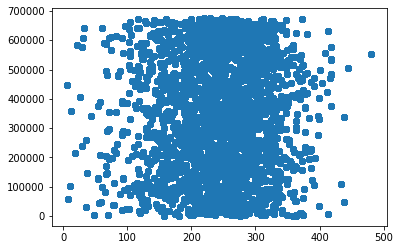

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df['first_innings_total_runs'], np.arange(0,(len(df))))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675146 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   over_n                    675146 non-null  int64  
 1   batter                    675146 non-null  object 
 2   bowler                    675146 non-null  object 
 3   non_striker               675146 non-null  object 
 4   batter_runs               675146 non-null  int64  
 5   extras_runs               675146 non-null  int64  
 6   total_delivery_runs       675146 non-null  int64  
 7   wicket_player_out         18416 non-null   object 
 8   wicket_kind               18416 non-null   object 
 9   wicket_taken              675146 non-null  bool   
 10  over_ball_n               675146 non-null  int64  
 11  over_fractional           675146 non-null  float64
 12  overall_ball_fraction     675146 non-null  float64
 13  batting_team              675146 non-null  obje

In [9]:
df = df[~((df.total_balls_bowled < 300) & (df.total_wickets_lost < 10))]


In [10]:
df['batting_team_balls_faced'] = df.groupby('batting_team')['batter'].transform('count')

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_51677/3378463659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team_balls_faced'] = df.groupby('batting_team')['batter'].transform('count')


In [11]:
df['batter_won_toss'] = (df['batting_team'] == df['toss_winner'])

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_51677/2971786830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batter_won_toss'] = (df['batting_team'] == df['toss_winner'])


In [12]:
def determine_bowl_team(row):
    if row['batting_team'] == row['team_one']:
        return row['team_two']
    return row['team_one']

In [13]:
df['bowling_team'] = df.apply(determine_bowl_team, axis=1)

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_51677/3808377128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bowling_team'] = df.apply(determine_bowl_team, axis=1)


In [14]:
df['year'] = df['date'].str[0:4]

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_51677/155635252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].str[0:4]


In [15]:
df['match_id'] = df['city'] + df['batting_team'] + df['bowling_team'] + df['date']

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_51677/2705827292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_id'] = df['city'] + df['batting_team'] + df['bowling_team'] + df['date']


In [16]:
df['match_id'].value_counts()

DublinPakistanIreland2013-07-17                    326
LondonSri LankaEngland2006-06-17                   326
ChandigarhIndiaPakistan2007-11-08                  324
PeshawarIndiaPakistan2004-03-19                    323
PerthNew ZealandEngland2007-01-30                  323
                                                  ... 
PotchefstroomSouth AfricaPakistan2019-05-06        142
ChittagongWest IndiesBangladesh2011-10-18          134
NottinghamPakistanWest Indies2019-05-31            134
MirpurBangladeshWest Indies2011-03-04              115
KirtipurUnited States of AmericaNepal2020-02-12     73
Name: match_id, Length: 1859, dtype: int64

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644606 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   over_n                    644606 non-null  int64  
 1   batter                    644606 non-null  object 
 2   bowler                    644606 non-null  object 
 3   non_striker               644606 non-null  object 
 4   batter_runs               644606 non-null  int64  
 5   extras_runs               644606 non-null  int64  
 6   total_delivery_runs       644606 non-null  int64  
 7   wicket_player_out         17550 non-null   object 
 8   wicket_kind               17550 non-null   object 
 9   wicket_taken              644606 non-null  bool   
 10  over_ball_n               644606 non-null  int64  
 11  over_fractional           644606 non-null  float64
 12  overall_ball_fraction     644606 non-null  float64
 13  batting_team              644606 non-null  obje

<AxesSubplot:xlabel='current_wickets', ylabel='first_innings_total_runs'>

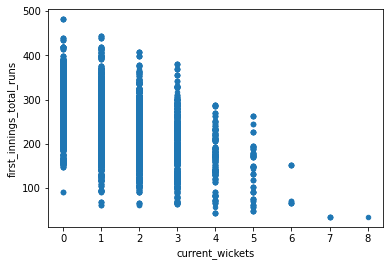

In [18]:
df[df.over_n == 10].plot.scatter('current_wickets', 'first_innings_total_runs')

In [19]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit

In [20]:
df = df[~df.city.isna()]

In [21]:
features = ["current_runs", "current_wickets", "overall_ball_n"]
target = ["first_innings_total_runs"]

In [22]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df, groups=df['match_id'])
train_inds, test_inds = next(split)

In [23]:
train = df.iloc[train_inds]
test = df.iloc[test_inds]
X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]


In [24]:
#X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [25]:
from catboost import CatBoostRegressor

In [26]:
clf = CatBoostRegressor(learning_rate=0.03, iterations=3000, eval_metric='RMSE')

In [27]:
clf.fit(X_train, y_train, eval_set= (X_test, y_test), early_stopping_rounds=50)

0:	learn: 61.7888563	test: 65.2890721	best: 65.2890721 (0)	total: 77.7ms	remaining: 3m 52s
1:	learn: 61.0618864	test: 64.5284810	best: 64.5284810 (1)	total: 95.4ms	remaining: 2m 22s
2:	learn: 60.3760760	test: 63.8144486	best: 63.8144486 (2)	total: 111ms	remaining: 1m 51s
3:	learn: 59.7291055	test: 63.1425959	best: 63.1425959 (3)	total: 126ms	remaining: 1m 34s
4:	learn: 59.1119094	test: 62.4935359	best: 62.4935359 (4)	total: 140ms	remaining: 1m 23s
5:	learn: 58.5090107	test: 61.8617971	best: 61.8617971 (5)	total: 154ms	remaining: 1m 16s
6:	learn: 57.9112431	test: 61.2358919	best: 61.2358919 (6)	total: 168ms	remaining: 1m 11s
7:	learn: 57.3608882	test: 60.6532500	best: 60.6532500 (7)	total: 182ms	remaining: 1m 8s
8:	learn: 56.8063451	test: 60.0773647	best: 60.0773647 (8)	total: 198ms	remaining: 1m 5s
9:	learn: 56.2867903	test: 59.5354817	best: 59.5354817 (9)	total: 214ms	remaining: 1m 3s
10:	learn: 55.7745702	test: 59.0015361	best: 59.0015361 (10)	total: 229ms	remaining: 1m 2s
11:	learn:

41.74


In [28]:
preds = clf.predict(X_test)

In [29]:
from sklearn.metrics import check_scoring

In [33]:
clf.score(X_test, y_test)

: 

: 

In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf, n_iter = 2).fit(X_test,y_test)
#from sklearn.inspection import permutation_importance
#permutation_importance(clf, X_test, y_test, n_jobs=1)


: 

: 

In [ ]:
flat_y_test = y_test.values.flatten()

In [ ]:
residuals = preds - flat_y_test

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_residuals(residuals, bins =40):
    fig = plt.figure()
    ax = fig.gca()
    ax.cla()
    ax.hist(residuals, bins = bins)
    return fig


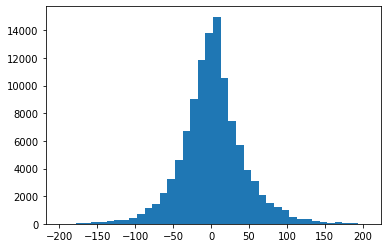

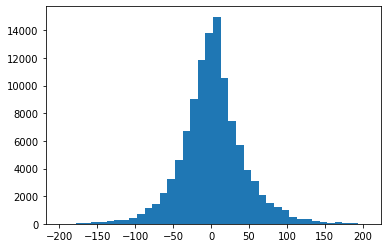

In [ ]:
plot_residuals(residuals)

In [ ]:
X_test['preds'] = preds
X_test['actual'] = y_test
X_test['residuals'] = preds - flat_y_test

/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_70518/917844508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['preds'] = preds
/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_70518/917844508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual'] = y_test
/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_70518/917844508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

In [ ]:
np.sqrt(mean_squared_error(y_test, preds))

41.907140228229245

In [ ]:
X_test

,current_runs,current_wickets,overall_ball_n,preds,actual,residuals
0,0,0,0,246.461016,276,-29.538984
1,0,0,1,246.461016,276,-29.538984
2,0,0,2,246.461016,276,-29.538984
3,1,0,3,246.846156,276,-29.153844
4,1,0,4,246.846156,276,-29.153844
...,...,...,...,...,...,...
164,117,9,164,130.577840,117,13.577840
165,117,9,165,130.626204,117,13.626204
166,117,9,166,130.943218,117,13.943218
167,117,9,167,130.753063,117,13.753063


(array([ 2.,  6., 14., 51., 94., 79., 70., 37., 12.,  3.]),
 array([-121.54678873,  -98.10839836,  -74.67000799,  -51.23161762,
         -27.79322725,   -4.35483688,   19.08355349,   42.52194386,
          65.96033423,   89.3987246 ,  112.83711497]),
 <BarContainer object of 10 artists>)

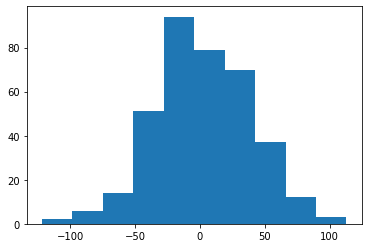

In [ ]:
plt.hist(X_test[X_test.overall_ball_n == 150]['residuals'])

In [ ]:
mid_way = X_test[X_test.overall_ball_n == 10]

In [ ]:
mid_way

,current_runs,current_wickets,overall_ball_n,preds,actual,residuals
10,4,0,10,244.688674,276,-31.311326
10,7,0,10,254.198974,181,73.198974
10,10,1,10,241.213434,203,38.213434
10,0,0,10,237.230380,309,-71.769620
10,6,0,10,251.512974,375,-123.487026
...,...,...,...,...,...,...
10,1,0,10,239.098302,170,69.098302
10,14,0,10,277.670412,265,12.670412
10,13,0,10,276.624793,128,148.624793
10,4,0,10,244.688674,230,14.688674


In [ ]:
np.sqrt(mean_squared_error(mid_way['actual'], mid_way['preds']))

66.40616222337655

In [ ]:
def rmse_at_balls(test_df, balls):
    ball_df = test_df[test_df.overall_ball_n == balls]
    return np.sqrt(mean_squared_error(ball_df['actual'], ball_df['preds']))

In [ ]:
rmse_at_balls(X_test, 11)

66.16754705566882

In [ ]:
rmse_x = []
rmse_y = []
for i in range(12, 270):
    rmse_x.append(i)
    rmse_y.append(rmse_at_balls(X_test, i))


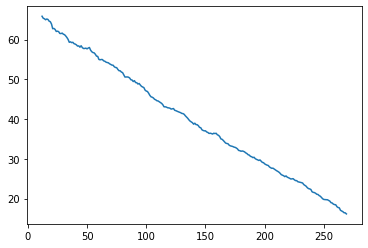

In [ ]:
plt.plot(rmse_x, rmse_y)

In [ ]:
def rmse_team(test_df, country):
    country_df = test_df[test_df.batting_team == country]
    return np.sqrt(mean_squared_error(country_df['actual'], country_df['preds']))

In [ ]:
rmse_team(X_test, 'Sri Lanka')

AttributeError: 'DataFrame' object has no attribute 'batting_team'

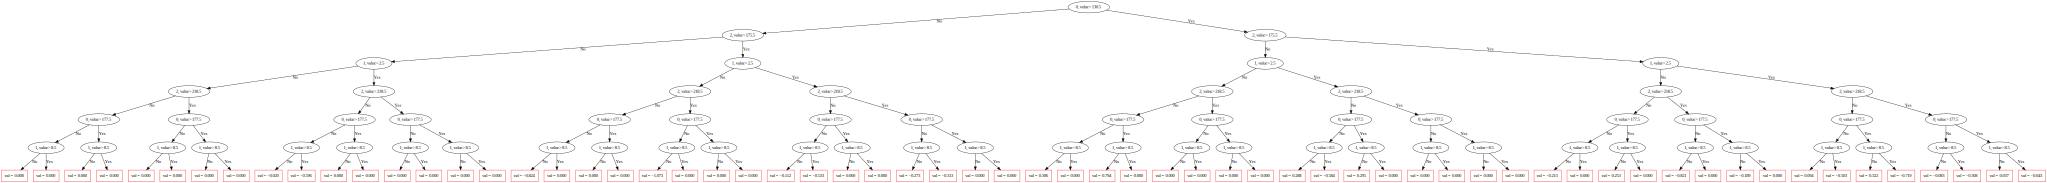

In [ ]:
clf.plot_tree(200)